2만명분의 키, 몸무게, 상태 데이터 만들기

만든 데이터로 SVM학습을 통해 비만도를 정확하게 맞출 수 있는지 test

bmi = kg / m * m 

bmi 함수 생성
18.5 미만 : 'thin'
25 미만   : 'normal'
나머지     : 'fat' 


키 : 120 ~ 200이하의 랜덤한 정수

몸무게 : 35 ~ 90 이하의 랜덤한 점수

=> 20000개의 데이터

ex) {182,42,thin}

{182,42,thin}

{182,42,thin}

...

{'thin':1233,'normal':2122,'fat':2322} 결과 출력

In [ ]:
import random


In [ ]:
# 비만도 측정해주는 함수
def getBimando(h,w):
  bmi = w / (h/100) ** 2
  if (bmi < 18.5):return 'thin'
  elif (bmi < 25) : return 'normal'
  return 'fat'

In [ ]:
# 작성할 csv 파일 만들기
f = open('bmi.csv','w',encoding='UTF-8')
f.write('height,weight,status\n')

# 2만명분의 무작위 데이터 생성
s = {'thin':0, 'normal':0, 'fat':0} # 기본 변수
  # randint 함수 : 파라미터로 들어온 x, y 사이에서 랜덤한 정수(int)를 반환
  # x <= N <= y
for i in range(20000):        # 2만개
  h = random.randint(120,200) # 120 <= h <= 200
  w = random.randint(35,90)   # 35 <= w <= 90
  status = getBimando(h,w)
  s[status] += 1

  f.write('{0},{1},{2}\n'.format(h,w,status))

f.close()
print(s)

{'thin': 5241, 'normal': 5582, 'fat': 9177}


In [ ]:
import pandas as pd

# csv 파일을 dataframe으로 읽어오기
biman = pd.read_csv('bmi.csv')
biman.head()

,height,weight,status
0,136,53,fat
1,152,74,fat
2,130,45,fat
3,198,84,normal
4,168,40,thin


In [ ]:
# column(열)으로 자르고 정규화 (Normalization)
status = biman['status']
# 최소 - 최대 정규화 (Min-Max Mormalization)
h = biman['height'] / 200 # 최대 200cm이라고 가정
w = biman['weight'] / 100 # 최대 100kg이라고 가정
hw = pd.concat([h,w], axis=1) # concat : dataframe 합치기
hw.head()


,height,weight
0,0.68,0.53
1,0.76,0.74
2,0.65,0.45
3,0.99,0.84
4,0.84,0.40


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import matplotlib.pyplot as plt

In [ ]:
# train_data(학습전용), test_data(테스트전용)로 나누기
data_train, data_test, status_train, status_test = train_test_split(hw,status, test_size=0.3)


# data 학습시키기
clf = svm.SVC()
clf.fit(data_train, status_train)

# data 예측하기
predict = clf.predict(data_test)

# 결과 test
score = metrics.accuracy_score(status_test, predict) # 정답 배열과 예측값의 배열을 넣으면 정확도를 평가해줌
report = metrics.classification_report(status_test, predict) # 두 클래스의 정밀도와 재현율 평가해줌

print(score)
print("-----")
print(report)

# Accuracy(정확도), Precision(정밀도), Recall(재현율)
# F1-score : 정밀도와 재현율의 조화평균 식 = 2* (P*R/P+R)

0.9961666666666666
-----
              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      2727
      normal       0.99      0.99      0.99      1680
        thin       0.99      1.00      1.00      1593

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



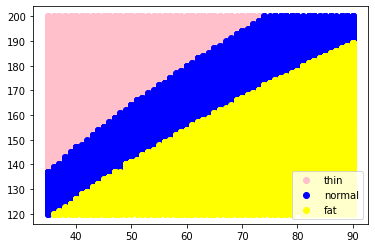

In [ ]:
# 결과를 그래프로

# pandas로 csv파일 불러오기
biman = pd.read_csv('bmi.csv',index_col=2) # index_col : index로 만들 열 지정
biman

# 그래프 그리기
fig = plt.figure()
graph = fig.add_subplot(1,1,1)

# status별(지정한 레이블별)로 색을 다르게 설정 (subplot 전용)
def scatter(lbl,color):
  b = biman.loc[lbl]
  graph.scatter(b['weight'],b['height'], c=color,label=lbl)

scatter('thin','pink')
scatter('normal','blue')
scatter('fat','yellow')
graph.legend()

# 이미지 저장
plt.savefig('bmi.png')